In [24]:
!pip install -q kaggle

In [25]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [26]:
!cp kaggle.json ~/.kaggle

In [27]:
!kaggle datasets download -d jsphyg/weather-dataset-rattle-package

weather-dataset-rattle-package.zip: Skipping, found more recently modified local copy (use --force to force download)


In [28]:
!unzip /content/weather-dataset-rattle-package.zip

Archive:  /content/weather-dataset-rattle-package.zip
replace weatherAUS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [29]:
!unzip /content/ML_prediction.zip

Archive:  /content/ML_prediction.zip


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data=pd.read_csv('/content/weatherAUS.csv')

In [32]:
df  = pd.DataFrame(data)

In [33]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [34]:
df.shape

(145460, 23)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [36]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [37]:
corr=df.corr()
corr

<ipython-input-37-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [38]:
df["Cloud9am"].value_counts()

7.0    19972
1.0    15687
8.0    14697
0.0     8642
6.0     8171
2.0     6500
3.0     5914
5.0     5567
4.0     4420
9.0        2
Name: Cloud9am, dtype: int64

In [39]:
df["RainToday"].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [40]:
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [41]:
df["Location"].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [42]:
df["Date"].value_counts()

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64

<Axes: >

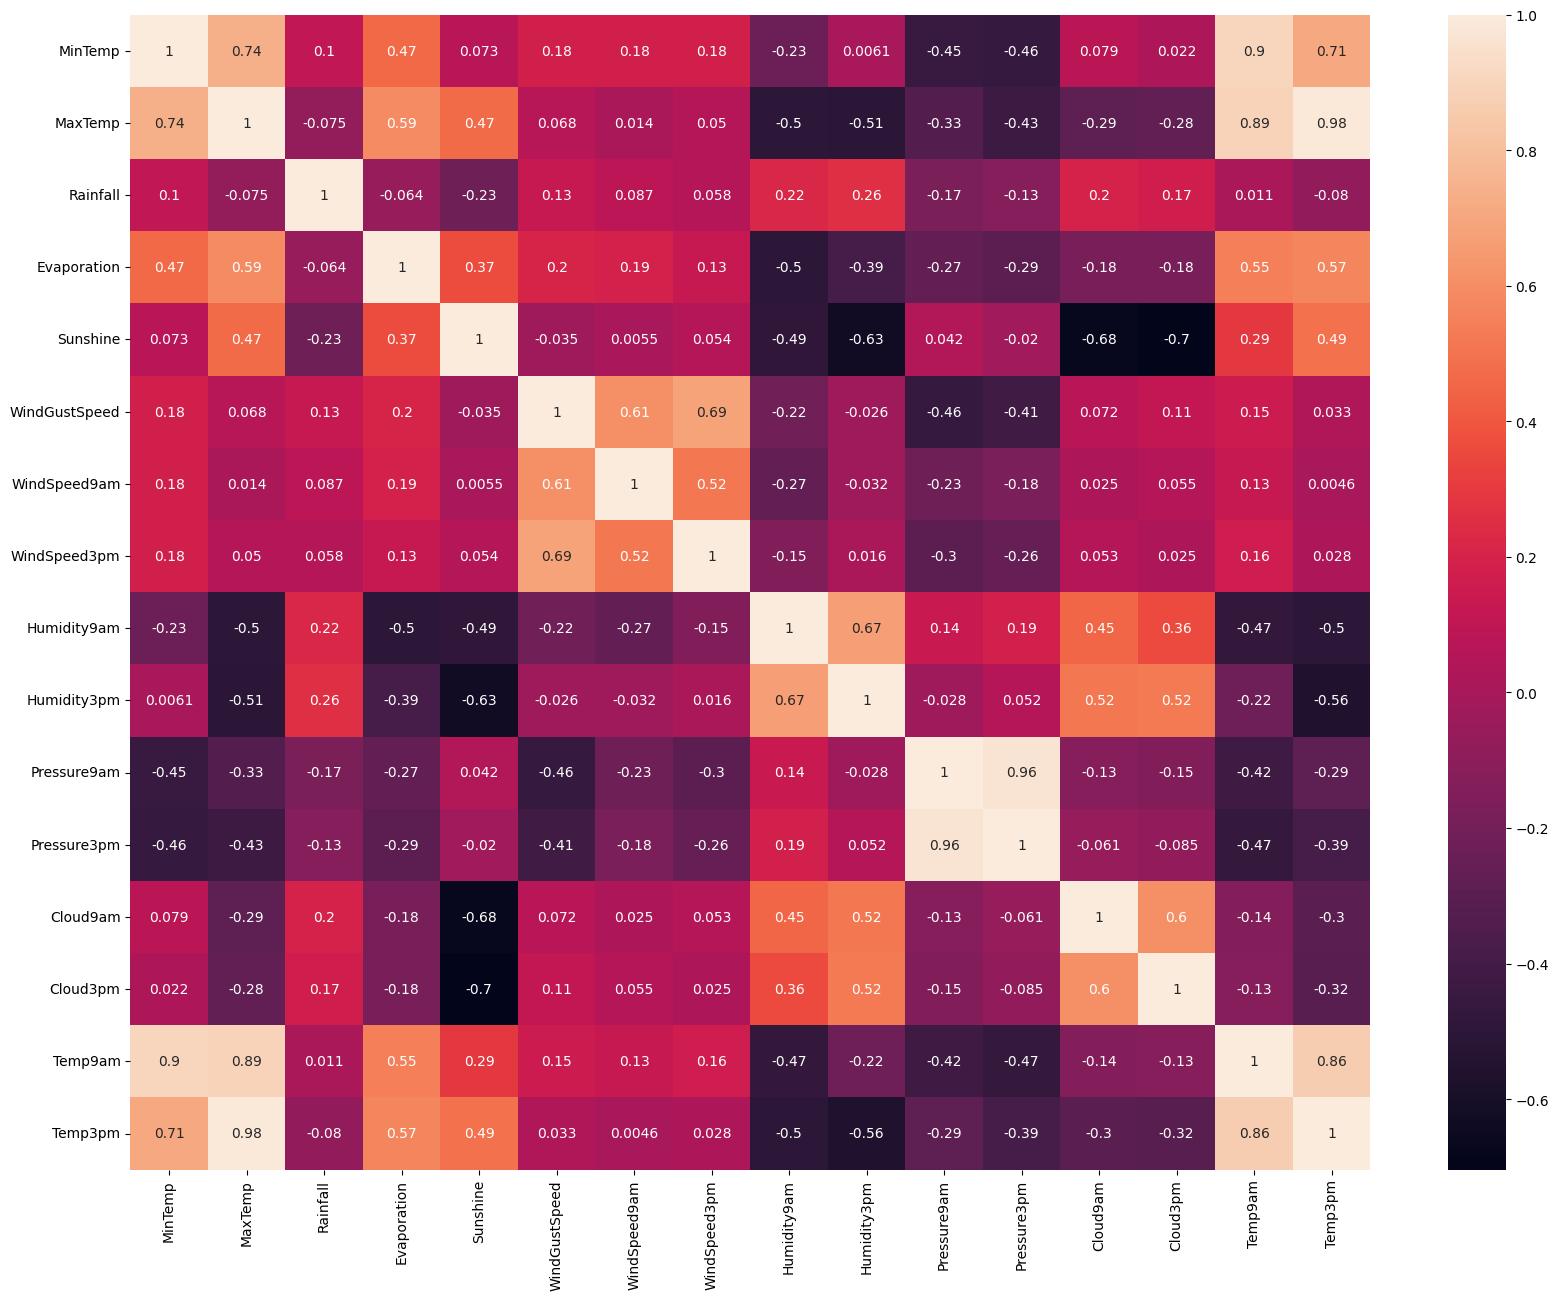

In [43]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [44]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", utc=True)

In [45]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [46]:
df.sort_values(by = "Date")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
45587,2007-11-01 00:00:00+00:00,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,1015.0,7.0,7.0,14.4,23.6,No,Yes,2007,11,1
45588,2007-11-02 00:00:00+00:00,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,1008.4,5.0,3.0,17.5,25.7,Yes,Yes,2007,11,2
45589,2007-11-03 00:00:00+00:00,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,1007.2,8.0,7.0,15.4,20.2,Yes,Yes,2007,11,3
45590,2007-11-04 00:00:00+00:00,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,1007.0,2.0,7.0,13.5,14.1,Yes,Yes,2007,11,4
45591,2007-11-05 00:00:00+00:00,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,1018.5,7.0,7.0,11.1,15.4,Yes,No,2007,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64190,2017-06-25 00:00:00+00:00,Sale,0.1,14.8,0.0,NaN,NaN,NaN,NaN,WNW,...,1013.2,NaN,NaN,5.9,14.0,No,No,2017,6,25
67199,2017-06-25 00:00:00+00:00,MelbourneAirport,5.5,13.9,0.0,2.8,3.8,NNW,44.0,N,...,1015.5,7.0,7.0,8.1,12.2,No,No,2017,6,25
70392,2017-06-25 00:00:00+00:00,Melbourne,8.6,14.3,0.0,2.8,3.8,NW,35.0,N,...,1015.0,7.0,7.0,9.3,13.4,No,Yes,2017,6,25
123830,2017-06-25 00:00:00+00:00,Perth,6.3,17.0,0.0,1.6,7.9,E,26.0,SE,...,1026.0,1.0,3.0,11.5,15.6,No,No,2017,6,25


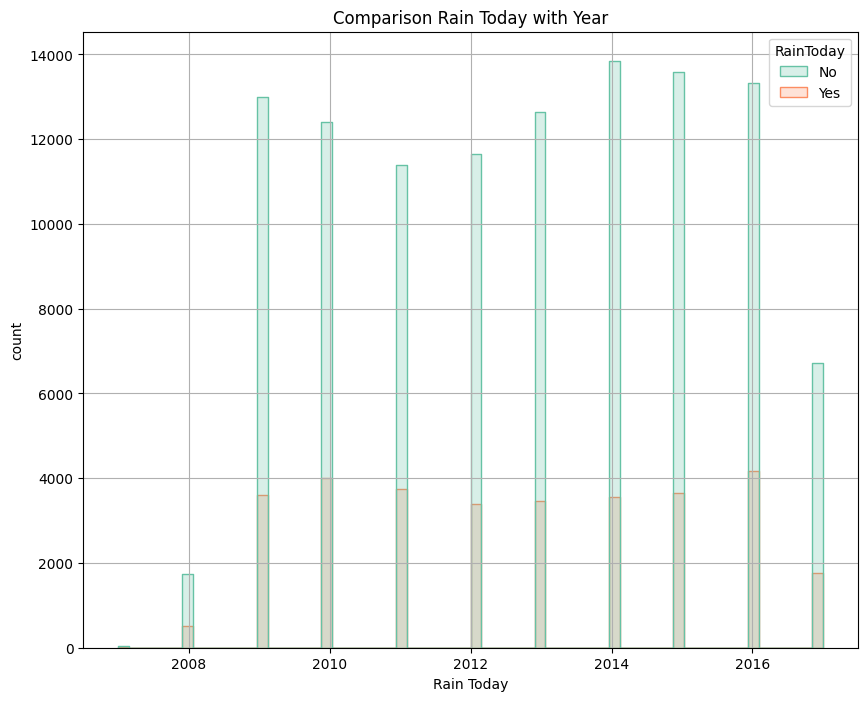

In [47]:
plt.figure (figsize=(10,8))
sns.histplot(x= "Year", hue = "RainToday",data =df, palette ="Set2",element ="step",common_norm=False)
plt.grid()
plt.title("Comparison Rain Today with Year")
plt.xlabel("Rain Today" )
plt.ylabel("count")
plt.show()

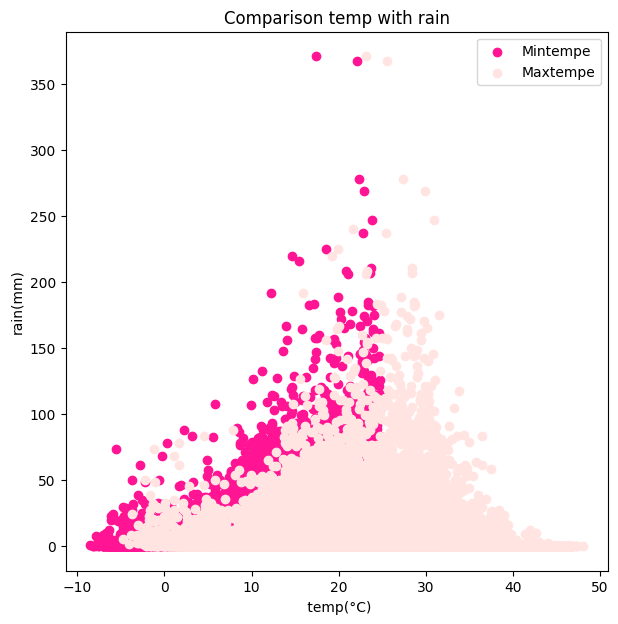

In [48]:
plt.figure(figsize=(7,7))
plt.scatter (df['MinTemp'], df["Rainfall"],color ="deeppink")
plt.scatter (df['MaxTemp'], df["Rainfall"],color ="mistyrose")
plt.title('Comparison temp with rain')
plt.xlabel(' temp(°C)')
plt.ylabel('rain(mm)')

plt.legend(['Mintempe','Maxtempe'])
plt.show()

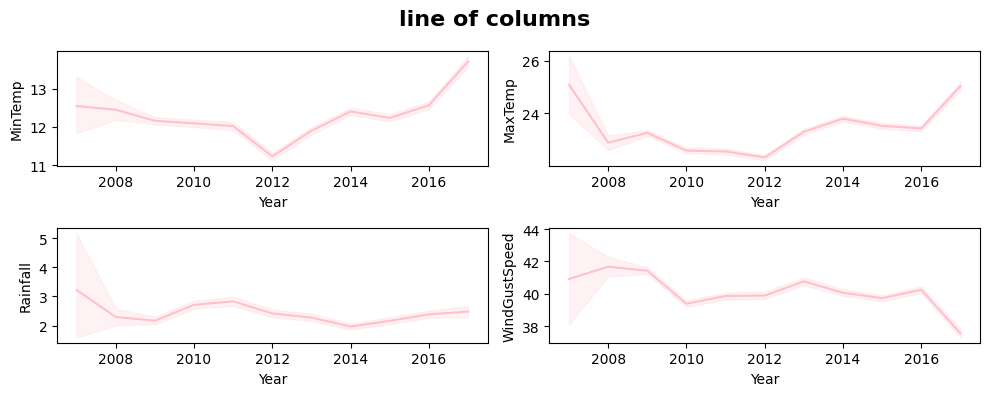

In [49]:
fig, axes = plt.subplots(figsize=(10, 4), nrows=2, ncols=2)
fig.suptitle('line of columns', fontsize=16, fontweight='bold')

i = 0
j = 0
columns = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed']
for col in columns:
    sns.lineplot(ax=axes[i, j], data=df, x='Year', y=col, color='pink')
    if j == 1:
        i += 1
        j = 0
    else:
        j += 1

plt.tight_layout()
plt.show()

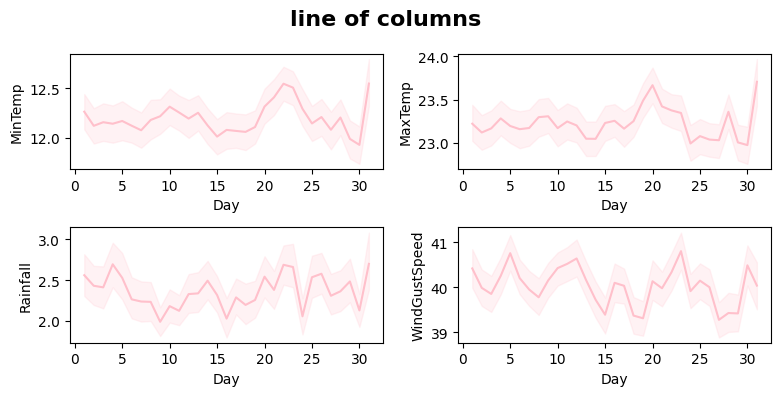

In [50]:
fig, axes = plt.subplots(figsize=(8, 4), nrows=2, ncols=2)
fig.suptitle('line of columns', fontsize=16, fontweight='bold')

i = 0
j = 0
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed']

for col in columns:
    sns.lineplot(ax=axes[i, j], data=df, x='Day', y=col, color='pink')
    if j == 1:
        i += 1
        j = 0
    else:
        j += 1

plt.tight_layout()
plt.show()

<Axes: xlabel='Rainfall', ylabel='Location'>

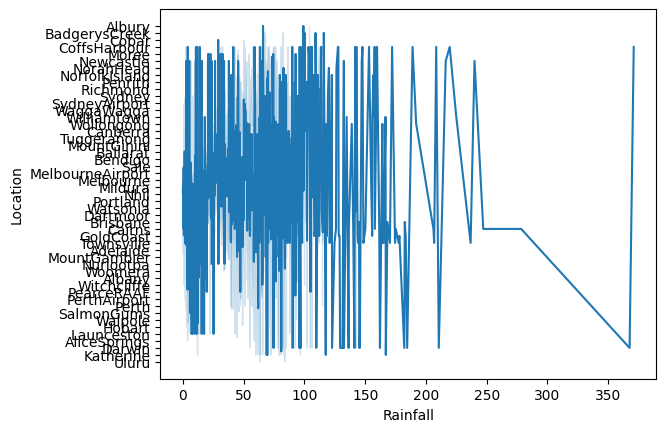

In [51]:
sns.lineplot(x="Rainfall",y="Location",data=df)

In [52]:
df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
Year             False
Month            False
Day              False
dtype: bool

In [53]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [54]:
df2 = pd.DataFrame(df,columns = ["Location","WindGustDir","WindDir9am","WindDir3pm","RainToday","RainTomorrow"])
df3 = pd.DataFrame(df,columns = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm'])

In [55]:
for i in df3:
  df[i]=df[i].fillna(0)

In [56]:
for i in df2:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [57]:
df.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
Year             False
Month            False
Day              False
dtype: bool

In [58]:
df=df.drop("Date",axis=1)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,WNW,...,1007.1,8.0,0.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,WSW,...,1007.8,0.0,0.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,WSW,...,1008.7,0.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,E,...,1012.8,0.0,0.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,0.0,0.0,E,31.0,SE,ENE,...,1020.3,0.0,0.0,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,0.0,0.0,NNW,22.0,SE,N,...,1019.1,0.0,0.0,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,0.0,0.0,N,37.0,SE,WNW,...,1016.8,0.0,0.0,12.5,26.1,No,No,2017,6,23
145458,Uluru,7.8,27.0,0.0,0.0,0.0,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


In [59]:
x=df.iloc[:,:21]
y=df["RainTomorrow"]

In [60]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No
1,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No
2,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No
4,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,0.0,0.0,E,31.0,SE,ENE,...,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,No
145456,Uluru,3.6,25.3,0.0,0.0,0.0,NNW,22.0,SE,N,...,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,No
145457,Uluru,5.4,26.9,0.0,0.0,0.0,N,37.0,SE,WNW,...,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,No
145458,Uluru,7.8,27.0,0.0,0.0,0.0,SE,28.0,SSE,N,...,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No


In [61]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
x.Location = le1.fit_transform(x.Location)
le2 = LabelEncoder()
x.WindGustDir = le2.fit_transform(x.WindGustDir)
le3 = LabelEncoder()
x.WindDir9am = le3.fit_transform(x.WindDir9am)
le4 = LabelEncoder()
x.WindDir3pm = le4.fit_transform(x.WindDir3pm)
le5 = LabelEncoder()
x.RainToday = le5.fit_transform(x.RainToday)

In [84]:
le6= LabelEncoder()
y=le6.fit_transform(y)

In [85]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,0.0,0.0,13,44.0,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0
1,2,7.4,25.1,0.0,0.0,0.0,14,44.0,6,15,...,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0
2,2,12.9,25.7,0.0,0.0,0.0,15,46.0,13,15,...,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0
3,2,9.2,28.0,0.0,0.0,0.0,4,24.0,9,0,...,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0
4,2,17.5,32.3,1.0,0.0,0.0,13,41.0,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,0.0,0.0,0,31.0,9,1,...,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,0
145456,41,3.6,25.3,0.0,0.0,0.0,6,22.0,9,3,...,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,0
145457,41,5.4,26.9,0.0,0.0,0.0,3,37.0,9,14,...,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,0
145458,41,7.8,27.0,0.0,0.0,0.0,9,28.0,10,3,...,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0


In [88]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [89]:
x_scaled

array([[-1.53166617,  0.20523246, -0.01620475, ...,  0.01724645,
         0.08573194, -0.52979545],
       [-1.53166617, -0.72031204,  0.28078019, ...,  0.06193983,
         0.41315549, -0.52979545],
       [-1.53166617,  0.12810375,  0.36177609, ...,  0.6280559 ,
         0.26908913, -0.52979545],
       ...,
       [ 1.20928479, -1.02882688,  0.52376787, ..., -0.63825637,
         0.64890045, -0.52979545],
       [ 1.20928479, -0.65860907,  0.53726719, ..., -0.25091379,
         0.63580351, -0.52979545],
       [ 1.20928479,  0.43661859, -3.10754799, ..., -0.26581159,
        -0.03214054, -0.52979545]])

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [91]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(116368, 21) (29092, 21) (116368,) (29092,)


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(n_estimators=100, random_state=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
y_pred

Accuracy: 85.56%


array([0, 0, 0, ..., 0, 0, 0])

#evaluation of model

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22726
           1       0.76      0.50      0.60      6366

    accuracy                           0.86     29092
   macro avg       0.82      0.73      0.76     29092
weighted avg       0.85      0.86      0.84     29092



In [94]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[21718  1008]
 [ 3192  3174]]


In [95]:
precision=3192/(3192+1008)
precision

0.76

In [96]:
recall=3192/(3192+3192)
recall

0.5

In [97]:
F1_Score = 2 * (precision * recall) / (precision + recall)
F1_Score

0.6031746031746031

In [99]:
probability=clf.predict_proba(x_test)[:,1]
fpr,tpr,threshsholds=roc_curve(y_test,probability)

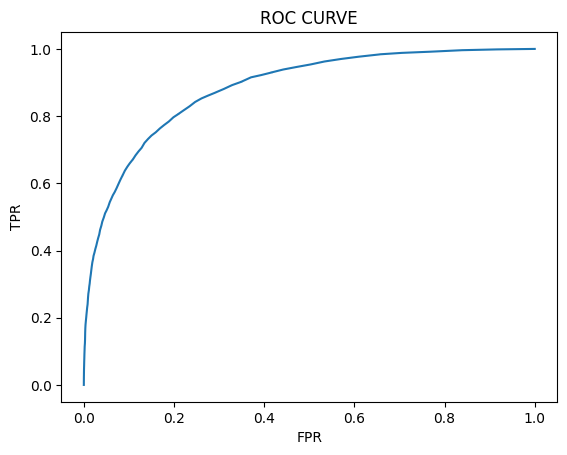

In [100]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

In [98]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.14436958614051973
Mean Squared Error: 0.14436958614051973
Root Mean Squared Error: 0.37995997965643663


In [76]:
import pickle
pickle.dump(clf,open("/content/ML_prediction/rain.pkl","wb"))